# Pandas Foundations

## Data Ingestion and Inspection

### Review of Pandas DataFrames

In [15]:
import pandas as pd

df = pd.read_csv('data/world_population.csv', index_col=0)
print(df.head())
print(df.tail())

      Total Population
Year                  
1960      3.034971e+09
1970      3.684823e+09
1980      4.436590e+09
1990      5.282716e+09
2000      6.115974e+09
      Total Population
Year                  
1970      3.684823e+09
1980      4.436590e+09
1990      5.282716e+09
2000      6.115974e+09
2010      6.924283e+09


In [16]:
import numpy as np

# Create array of DataFrame values
np_vals = df.values

# Create new array of base 10 logarithm values
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10()
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

### Building DataFrames from Scratch

In [18]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key, value) tuples and inspect the list
zipped = list(zip(list_keys, list_values))
print(zipped)

# Build and inspect a dictionary with the zipped list
data = dict(zipped)
print(data)

# Build and inspect a DataFrame from the dictionary
df = pd.DataFrame(data)
print(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
{'Country': ['United States', 'Soviet Union', 'United Kingdom'], 'Total': [1118, 473, 273]}
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


In [21]:
list_keys = ['a', 'b', 'c', 'd']
list_values = [[1980, 1981, 1982], ['Blondie', 'Christopher Cross', 'Joan Jett'], 
            ['Call Me', 'Arthurs Theme', 'Joan Jett I Love Rock and Roll'], [6, 3, 7]]
df = pd.DataFrame(dict(list(zip(list_keys, list_values))))
# Build a list of labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute
df.columns = list_labels

print(df)

   year             artist                            song  chart weeks
0  1980            Blondie                         Call Me            6
1  1981  Christopher Cross                   Arthurs Theme            3
2  1982          Joan Jett  Joan Jett I Love Rock and Roll            7


In [24]:
# Make a list of cities' names
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 
          'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 
          'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']

# Make a string with the value 'PA'
state = 'PA'

# Construct a dictionary
data = {'state': state, 'city': cities}
print(data)

# Construct a DataFrame with broadcasting
df = pd.DataFrame(data)
print(df)

{'state': 'PA', 'city': ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']}
   state             city
0     PA          Manheim
1     PA     Preston park
2     PA      Biglerville
3     PA          Indiana
4     PA     Curwensville
5     PA            Crown
6     PA     Harveys lake
7     PA  Mineral springs
8     PA        Cassville
9     PA       Hannastown
10    PA        Saltsburg
11    PA      Tunkhannock
12    PA       Pittsburgh
13    PA        Lemasters
14    PA       Great bend


### Importing and Exporting Data

In [27]:
# Read in the file, specifying the header and names
df = pd.read_csv('data/world_population.csv', header=0, names=['year', 'population'])
print(df)

   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


#### Delimiters, Headers, and Extensions

In [34]:
# Read in the file with correct parameters
df = pd.read_csv('data/messy_stock_data.tsv', delimiter=' ', header=3, comment='#')
print(df.columns)
print(df.head())

# Save the cleaned up DataFrame to a CSV file without the index
df.to_csv('data/clean_stock_data.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df.to_excel('data/clean_stock_data.xlsx', index=False)

Index(['name', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  512.42  537.99  559.72  540.50  535.24  532.92  590.09  636.84   
3   APPLE  110.64  125.43  125.97  127.29  128.76  127.81  125.34  113.39   

      Sep     Oct     Nov     Dec  
0  145.36  146.11  137.21  137.96  
1   43.56   48.70   53.88   55.40  
2  617.93  663.59  735.39  755.35  
3  112.80  113.36  118.16  111.73  


### Plotting with Pandas

#### Plotting Series using Pandas

In [36]:
# Importing Data
df = pd.read_csv('data/weather_data_austin_2010.csv')
print(df.columns)
print(df.head())

Index(['Temperature', 'DewPoint', 'Pressure', 'Date'], dtype='object')
   Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00


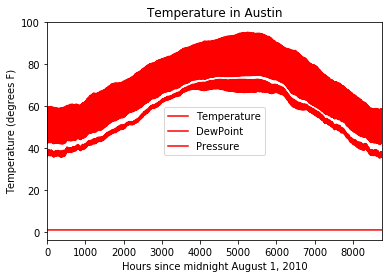

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a plot with color red
df.plot(color='red')
plt.title('Temperature in Austin')
plt.xlabel('Hours since midnight August 1, 2010')
plt.ylabel('Temperature (degrees F)')
plt.show()

#### Plotting DataFrames

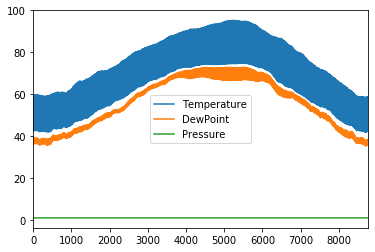

In [41]:
# Plot all columns by default
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119f517f0>,
      dtype=object)

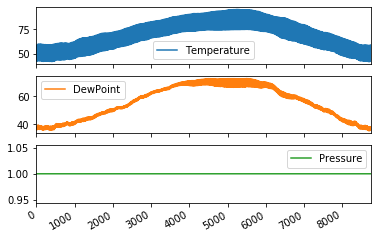

In [42]:
# Plot all columns as subplots
df.plot(subplots=True)

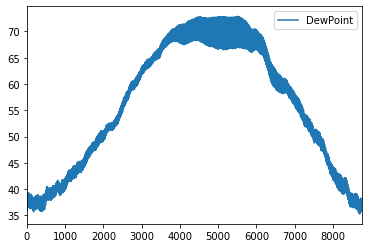

In [45]:
# Plot just the Dew Point data
column_list1 = ['DewPoint']
df[column_list1].plot()

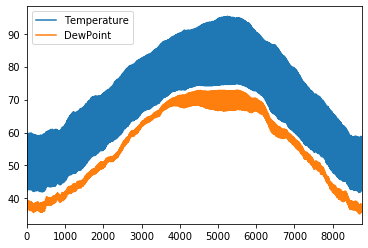

In [46]:
# Plot the Dew Point and Temperature data but not Pressure data
column_list2 = ['Temperature', 'DewPoint']
df[column_list2].plot()

## Exploratory Data Analysis

### Visual EDA

#### Pandas Line Plots

In [62]:
import pandas as pd

df = pd.read_csv('data/clean_stock_data.csv', index_col=0).T
df.reset_index(level=0, inplace=True)
print(df.columns)
df.rename(columns={'index': 'Month'}, inplace=True)
print(df.columns)
print(df)

Index(['index', 'IBM', 'MSFT', 'GOOGLE', 'APPLE'], dtype='object', name='name')
Index(['Month', 'IBM', 'MSFT', 'GOOGLE', 'APPLE'], dtype='object', name='name')
name Month     IBM   MSFT  GOOGLE   APPLE
0      Jan  156.08  45.51  512.42  110.64
1      Feb  160.01  43.08  537.99  125.43
2      Mar  159.81  42.13  559.72  125.97
3      Apr  165.22  43.47  540.50  127.29
4      May  172.25  47.53  535.24  128.76
5      Jun  167.15  45.96  532.92  127.81
6      Jul  164.75  45.61  590.09  125.34
7      Aug  152.77  45.51  636.84  113.39
8      Sep  145.36  43.56  617.93  112.80
9      Oct  146.11  48.70  663.59  113.36
10     Nov  137.21  53.88  735.39  118.16
11     Dec  137.96  55.40  755.35  111.73


#### Pandas Scatter Plots

Text(0, 0.5, 'Price (USD)')

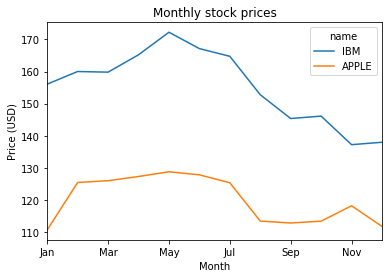

In [67]:
# Create a list of y-axis column names
y_columns = ['IBM', 'APPLE']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add a title
plt.title('Monthly stock prices')

# Add a y-axis label 
plt.ylabel('Price (USD)')

#### Pandas Boxplots

In [69]:
import pandas as pd

df = pd.read_csv('data/auto-mpg.csv')
print(df.columns)

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'], dtype='object')


weight       AxesSubplot(0.125,0.125;0.352273x0.755)
mpg       AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

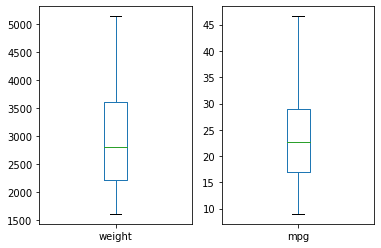

In [70]:
# Make a list of the column names to be plotted
cols = ['weight', 'mpg']

# Generate the boxplot
df[cols].plot(kind='box', subplots=True)

#### Pandas Hist, PDF and CDF

<class 'matplotlib.figure.Figure'> <class 'numpy.ndarray'> (2,)


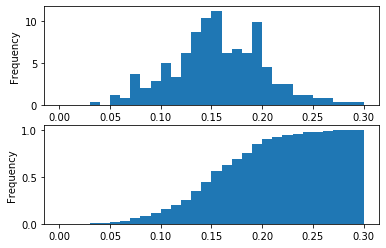

In [78]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)
print(type(fig), type(axes), axes.shape)

# Read data into DataFrame
df = pd.read_csv('data/tips.csv')

# Plot the PDF
df.fraction.plot(ax=axes[0], kind='hist', normed=True, bins=30, range=(0, 0.3))

# Plot the CDF
df.fraction.plot(ax=axes[1], kind='hist', normed=True, bins=30, cumulative=True, range=(0, 0.3))

### Statistical EDA

#### Median

In [79]:
df = pd.read_csv('data/auto-mpg.csv')

df.mpg.median()

22.75

#### Mean

0.8
19.0


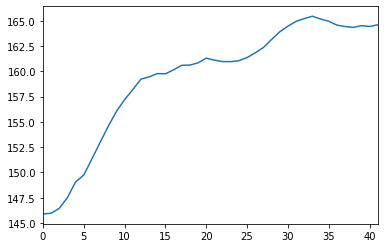

In [84]:
df = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')

# The minimum value of the Engineering column
print(df.Engineering.min())

# The maximum value of the Engineering column
print(df.Engineering.max())

# The mean percentage per year
mean = df.mean(axis='columns')

# Plot the yearly mean percentage
mean.plot()

#### Median vs Mean

In [86]:
df = pd.read_csv('data/titanic.csv')

# Print summary statistics of the fare column with describe
print(df.fare.describe())

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


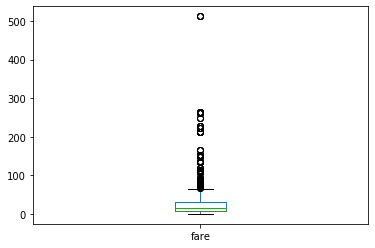

In [87]:
df.fare.plot(kind='box')

#### Quantiles

209
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

      ...   2007   2008    2009    2010   2011    2012    2013   2014    2015  \
0.05  ...  53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87  57.855   
0.95  ...  80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00  82.100   

         2016  
0.05  59.2555  
0.95  82.1650  

[2 rows x 218 columns]


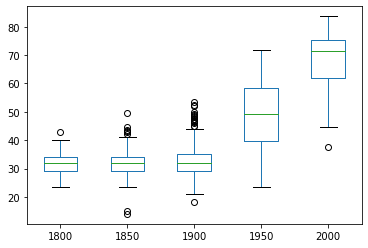

In [93]:
df = pd.read_csv('data/life_expectancy_at_birth.csv')

# Print the number of countries reported in 2015
print(df['2005'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a boxplot
years = ['1800', '1850', '1900', '1950', '2000']
df[years].plot(kind='box')
plt.show()

#### Standard Deviation

In [96]:
df = pd.read_csv('data/weather_data_austin_2010.csv')
print(df.columns)
print(df.head())

Index(['Temperature', 'DewPoint', 'Pressure', 'Date'], dtype='object')
   Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00


In [100]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d %H:%M')
df.Date.dtype

dtype('<M8[ns]')

In [102]:
jan = df[df['Date'].dt.month == 1]
print(jan.head())
print(jan.shape)

   Temperature  DewPoint  Pressure                Date
0         46.2      37.5       1.0 2010-01-01 00:00:00
1         44.6      37.1       1.0 2010-01-01 01:00:00
2         44.1      36.9       1.0 2010-01-01 02:00:00
3         43.8      36.9       1.0 2010-01-01 03:00:00
4         43.5      36.8       1.0 2010-01-01 04:00:00
(744, 4)


In [103]:
mar = df[df['Date'].dt.month == 3]
print(mar.shape)

(743, 4)


In [104]:
print(jan.Temperature.mean(), mar.Temperature.mean())
print(jan.Temperature.std(), mar.Temperature.std())

49.9873655913979 60.8955585464334
5.90756765806953 6.479669152231178


### Separating Populations

#### Filtering and Counting

In [106]:
df = pd.read_csv('data/auto-mpg.csv')
print(df.columns)

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'], dtype='object')


In [108]:
df[df['origin'] == 'Asia'].count()

mpg       79
cyl       79
displ     79
hp        79
weight    79
accel     79
yr        79
origin    79
name      79
dtype: int64

#### Separate and Plot

In [109]:
df = pd.read_csv('data/titanic.csv')
print(df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


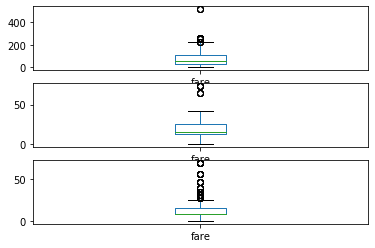

In [111]:
# Display the boxplots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a boxplot of the fare prices for First class passengers
df[df['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a boxplot of the fare prices for Second class passengers
df[df['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a boxplot of the fare prices for Third class passengers
df[df['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')